In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
from matplotlib.font_manager import FontProperties as FP

#Set ffmpeg location
plt.rcParams['animation.ffmpeg_path'] = '../ffmpeg/bin/ffmpeg.exe'

#Set fig size
plt.rcParams['figure.figsize'] = (20,12)

#Set font globally
plt.rcParams['font.family'] = ['fantasy']

#Set font variable for individual object
font = FP(fname="../Font/SimHei.ttf")

#Set style
plt.style.use('fivethirtyeight')

In [2]:
#Prepare data
df = pd.read_excel("../Data/CPI_Annual_growth_rate.xlsx")
df

,統計期,總指數
0,77年1月,0.54
1,77年2月,0.35
2,77年3月,0.58
3,77年4月,0.35
4,77年5月,1.47
...,...,...
426,112年7月,1.88
427,112年8月,2.53
428,112年9月,2.93
429,112年10月,3.05


In [3]:
#Prepare data list
x = df['統計期']
y = df['總指數']

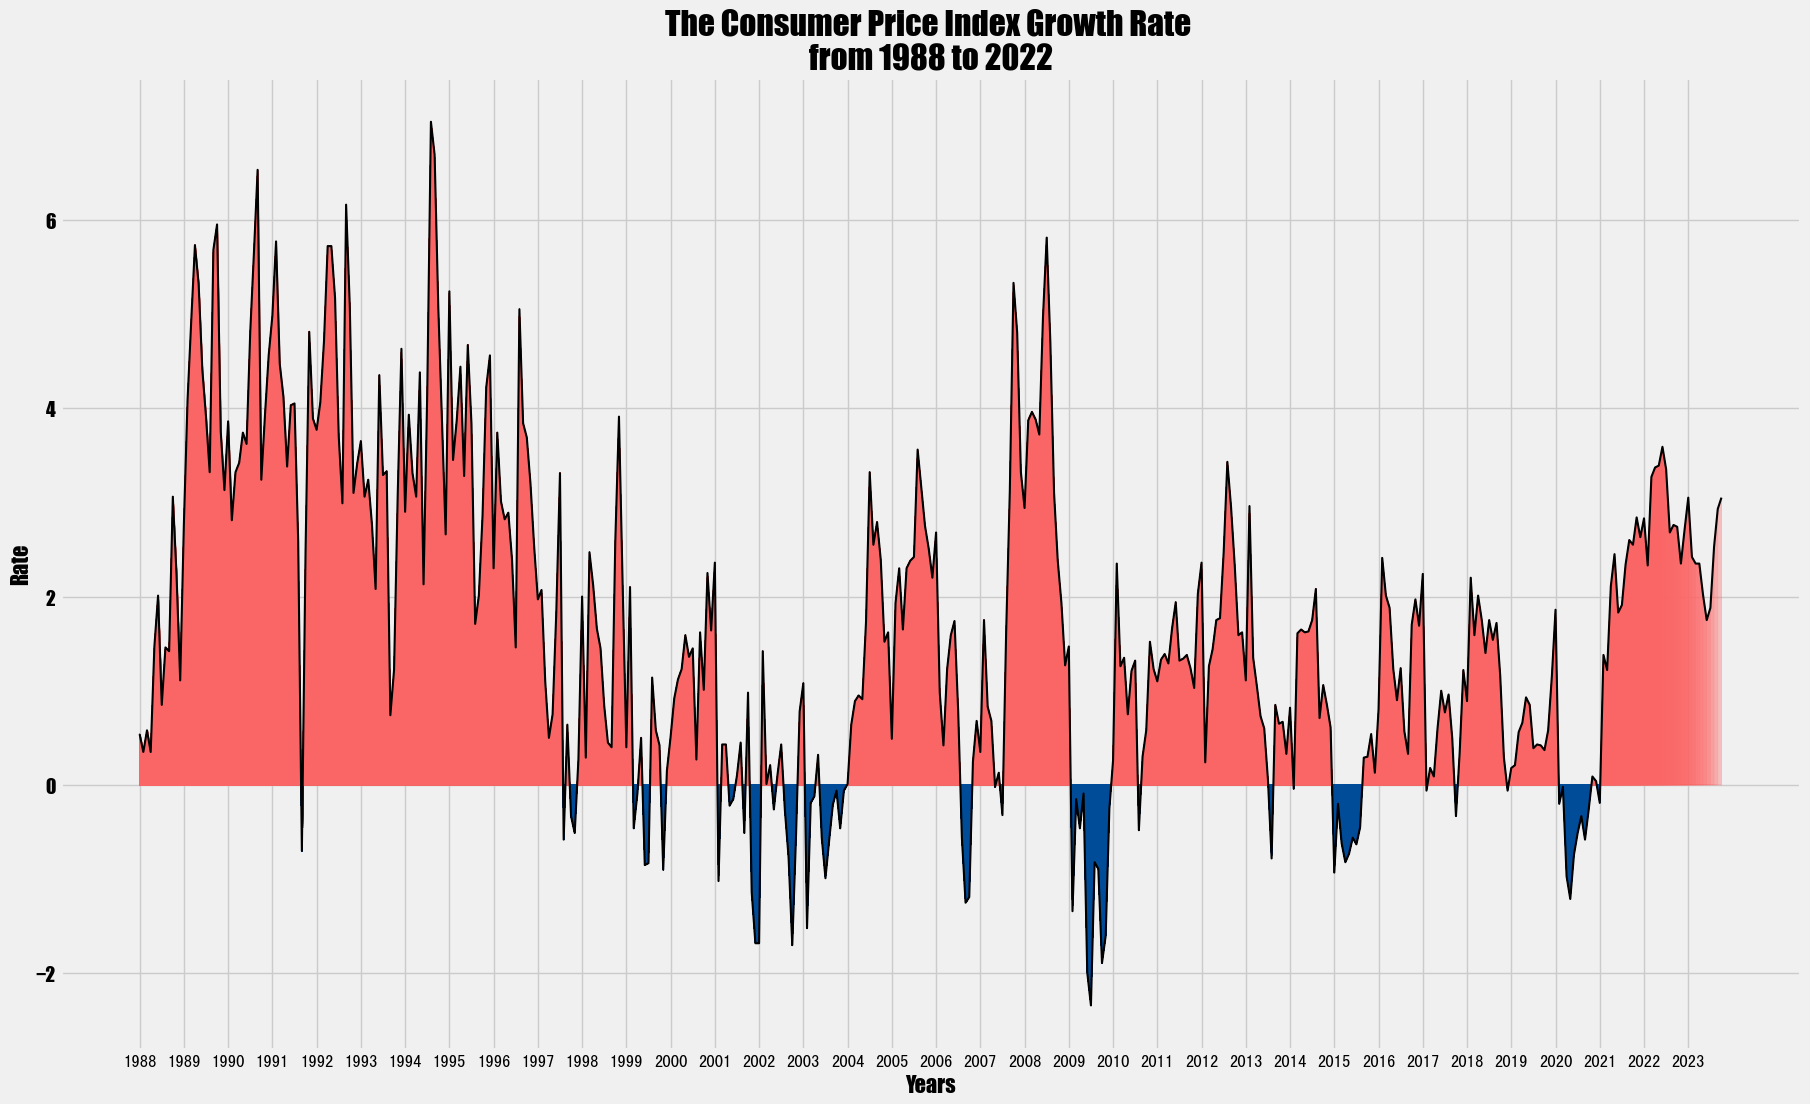

In [4]:
#動態圖

fig, ax = plt.subplots()

#Set custom label for x axis
values = [ n*12 for n in range(0,36)] 
test_X = [ str(year) for year in range(1988,2024) ]
plt.xticks(values,test_X,fontsize=12, fontproperties=font )

#Set title and labels 
plt.title("The Consumer Price Index Growth Rate \n from 1988 to 2022 ", fontsize=24)
plt.xlabel("Years", fontsize=16)
plt.ylabel("Rate", fontsize=16)

#Initialize a plot with arguments, without data
line_1, = ax.plot([], [], color="black", linewidth=1.5)

def init():
    line_1.set_data([], [])
    return line_1,

def animate(i):
    
    key = x.values[0:(i-1)]
    value = y.values[0:(i-1)]

    #Draw line with current data set
    line_1.set_data(key,value) 
    
    #Fill color with either red or blue
    p1 = plt.fill_between(key, value, 0, where= value>0, color="#FF6666", alpha=0.2, interpolate=True)
    p2 = plt.fill_between(key, value, 0, where= value<0, color="#004C99", alpha=0.2, interpolate=True)

    return line_1, p1, p2,

ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames = 432, interval=20, blit=True ) 

ani.save("../Output/Animation/CPI_AnnualGrowthRate.mp4")

plt.show()